# Project Goal
An important task in the ecology of the Antarctic is to catalog the many different species of penguins in that area. Determining the species of a penguin often requires a combination of biological expertise and many precise measurements, which can be difficult to obtain.

In the dystopian future, there are too many penguins. Because there are so many, we can’t take many detailed measurements on all of them! In order to classify the species of penguins in large volume, we need to figure out which measurements are most important for distinguishing penguin species.

Your goal in this mini project is to determine a small set of measurements that are highly predictive of a penguin’s species. Options include (but are not limited to) the island on which the penguin was encountered, the length and depth of the culmen (bill), the length of the flipper, the body mass, and the sex of the penguin. That is, you should determine which of these features is most predictive of the penguin’s species, using at least three distinct machine learning algorithms and evaluating the results.

Part of the point of this project is to use a small number of measurements (i.e. columns in the data). Your final set of models must use one (1) qualitative feature and two (2) quantitative features, corresponding to a total of just three distinct measurements per penguin. You’re permitted to use different features in each model, but each one must use one qualitative feature and two quantitative features.

For training and evaluating your models, we will use the Palmer Penguins data set. The Palmer Penguins data set was collected by collected by Dr. Kristen GormanLinks to an external site. and the Palmer Station, Antarctica LTERLinks to an external site., a member of the Long Term Ecological Research NetworkLinks to an external site.. Download the CSVLinks to an external site. data. It contains measurements on three penguin species: Chinstrap, Gentoo, and Adelie.

### Group Members: Ava Shafran, Jack Hambidge, Shani Shaham

### 1) Group Contribution Statement

All three of us worked together in the data cleaning/prep work and in the exploratory analysis. Ava led the summary table, the base code of the decision region function, and the random forest classification model. Shani led Figures 1, 2, & 3, and the logistic regression model. Jack led the SGD classification model, wrote the conclusion and the section introductions, and ensured all functions had proper docstrings. Ava and Shani worked on the Feature Analysis together. We each wrote the explanations for the figures we created and models we implemented. We all checked and revised each other's work. We also met frequently to ensure that we all understood the work other people were doing and could collaborate on more difficult aspects of the project.

### 2) Data Import and Cleaning

We begin this project by importing the many packages we will use in this exploration, as well as our data! We will be using the penguins data used often in this course. The process of importing and cleaning our data will make it understandable to our models and usable to perform model training and testing! This process involves first splitting our data into two sets, the training data and the testing data, and then "cleaning" them individually. In practice, cleaning looks like dropping unused columns to make our data more readable by both an observer and, just as importantly, the model. We use the label encoder to replace words with an understandable format for our machine learning models.

In [ ]:
# Import all packages here
import pandas as pd
import urllib
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from operator import le
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder
import matplotlib.colors as mcolors

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
# Reading in palmers_penguins.csv file

url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
filedata = urllib.request.urlopen(url)
to_write = filedata.read()

with open("palmer_penguins.csv", "wb") as f:
    f.write(to_write)

# read csv file, save it as DataFrame
penguins = pd.read_csv('palmer_penguins.csv')

In [ ]:
# Splitting our data into training and test data
penguin_train, penguin_test = train_test_split(penguins, test_size=0.2)

In [ ]:
#Cleaning data via function call

le = LabelEncoder()

def clean_data(data):
  '''
  Drops unwanted columns, shortens species names, encodes Island, Sex, and
  Species as integers, drops any rows with NaN values and "." in the Sex column.
  Args: data (dataframe)
  Returns: data (cleaned dataframe)
  '''
  data = data.drop(columns=['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments'])
  data["Species"] = data["Species"].str.split().str.get(0)
  data["Island"] = data["Island"].replace({"Dream": 0, "Torgersen": 1, "Biscoe": 2})
  data["Sex"] = data["Sex"].replace({"MALE": 0, "FEMALE": 1})
  data["Species"] = data["Species"].replace({"Adelie": 0, "Chinstrap":1, "Gentoo":2})
  data = data.dropna()
  data = data.drop(data[data["Sex"] == "."].index)

  return data

# Clean the training and test dataframes using previously defined functions
penguin_train = clean_data(penguin_train)
penguin_test = clean_data(penguin_test)


<ipython-input-13-4dcdb79fdbaa>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Island"] = data["Island"].replace({"Dream": 0, "Torgersen": 1, "Biscoe": 2})
<ipython-input-13-4dcdb79fdbaa>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Species"] = data["Species"].replace({"Adelie": 0, "Chinstrap":1, "Gentoo":2})
<ipython-input-13-4dcdb79fdbaa>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects

In [ ]:
#how many rows and have NaN values?
penguin_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 24 to 322
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              258 non-null    int64  
 1   Region               258 non-null    object 
 2   Island               258 non-null    int64  
 3   Culmen Length (mm)   258 non-null    float64
 4   Culmen Depth (mm)    258 non-null    float64
 5   Flipper Length (mm)  258 non-null    float64
 6   Body Mass (g)        258 non-null    float64
 7   Sex                  258 non-null    object 
 8   Delta 15 N (o/oo)    258 non-null    float64
 9   Delta 13 C (o/oo)    258 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 22.2+ KB


### 3) Exploratory Analysis

After cleaning our data, and making it understandable for both the user and the machine, we aim to understand the data ourselves. This is important because we want to make the most accurate models possible, and this means giving them the best data to work with. Using a combination of graphs, we can visually observe "groups" of data points created through separation by features. These groups are what a good model can identify, separate, and classify correctly. Essentially, we want to put our models in a position to succeed!

In [ ]:
# Summary table function
def summary_table(data, group_cols, value_cols):
    """
    Creates a summary statistic table using the groupby() method, then
    taking the mean of each value_cols passed in, and rounding to 2 decimcal places.
    Inputs:
    data = dataframe passed in
    group_cols = qualitative columns in data
    value_cols = quantitative columns in data
    Output:
    summary_table = grouping the value_cols by the group_cols and taking the
                    value_cols mean
    """
    summary_table = data.groupby(group_cols)[value_cols].mean().round(2)
    return summary_table

# Create summary table using the training data
print("Summary Table: Mean Culmen Length and Depth by Species and Island")
summary_table(penguin_train, ["Species", "Island", "Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)"])


Summary Table: Mean Culmen Length and Depth by Species and Island


Culmen Length (mm)  Culmen Depth (mm)
Species Island Sex                                       
0       0      0                 40.06              18.87
               1                 37.06              17.63
        1      0                 40.92              19.32
               1                 37.42              17.42
        2      0                 40.17              19.02
               1                 38.00              17.66
1       0      0                 51.25              19.25
               1                 46.47              17.56
2       2      0                 49.68              15.80
               1                 45.60              14.20

Description of summary table: In this table, we focus on the breakdown of our training data based on Island, Species, Sex and Culmen Length and Depth. From our data cleaning, we know have disctionaries that correspond to each of our columns.

Species = {"Adelie": 0, "Chinstrap":1, "Gentoo":2}

Island = {"Dream": 0, "Torgersen": 1, "Biscoe": 2}

Sex = {"MALE": 0, "FEMALE": 1}

 Clearly, grouping our data by location is a simple filter that easily classifies the datapoints, as all Chinstap penguins are located on Biscoe, and all Gentoo on Torgersen. However, because Adelie penguins are located on all three islands, this one filter is not sufficient to correctly categorize our data. The other columns of this table display the mean of that species culmen length and depth on that specified island, where we generally see that all female penguins species culmen length and depth are smaller than males.

Text(0.5, 1.02, 'Culmen Length Distribution by Species')

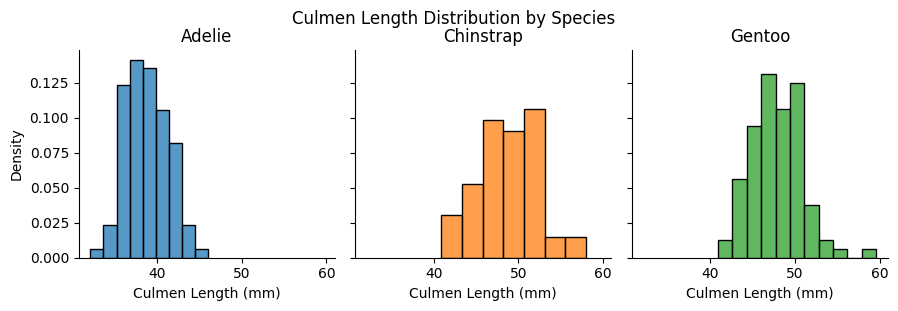

In [ ]:
# Visualizaion 1
"""
Creating Histogram of culmen length by species using seaborn facetgrid
"""

# Mapping dictionary for species names
species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}

# Create FacetGrid
fig = sns.FacetGrid(penguin_train, col="Species", sharey=True, hue = "Species")

# Map histplot to each subplot
fig.map(sns.histplot, "Culmen Length (mm)", stat="density")

# Set axis labels
fig.set_axis_labels("Culmen Length (mm)", "Density")
fig.set_titles("{col_name}")

# Customize subplot titles to show species names
for ax, col_val in zip(fig.axes.flat, fig.col_names):
    ax.set_title(species_mapping[int(col_val)])

# Set overall title with adjusted position
fig.fig.suptitle("Culmen Length Distribution by Species", y=1.02)


Description of figure 1: Histograms displaying the distrbution of culmen lengths for each species. This figure helps to understand differences in bill length distributions that can be utilized in our models. It is clear that Adelie penguins have shorter bills than Gentoo, and Chinstrap have the largest culmen on average.

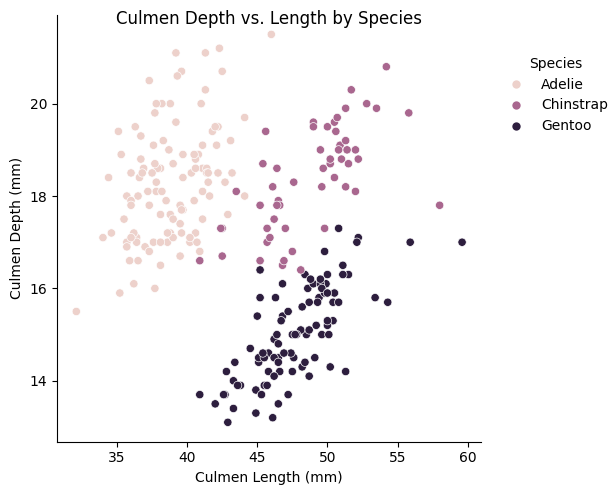

In [ ]:
#Visualization  2

# Mapping dictionary for species names
species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}

# Create scatterplot using seaborn relpot
plt = sns.relplot(data=penguin_train, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species")

# Update legend labels with species names
legend = plt.legend
for text in legend.texts:
    original_label = int(text.get_text())  # Convert label text to an integer
    text.set_text(species_mapping[original_label])  # Update with species name

# Adjust the position of the legend
legend.set_bbox_to_anchor((1.1, 0.8))

# Set title and axis labels
plt.fig.suptitle("Culmen Depth vs. Length by Species")
plt.set_axis_labels("Culmen Length (mm)", "Culmen Depth (mm)")

Description of figure 2: A scatterplot of culmen length by culmen depth, illustrates a very clear clustering on the dataset via these features.

<ipython-input-33-f3afef03d277>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels([island_mapping[int(tick.get_text())] for tick in plt.get_xticklabels()])


[Text(0, 0, 'Dream'), Text(1, 0, 'Torgersen'), Text(2, 0, 'Biscoe')]

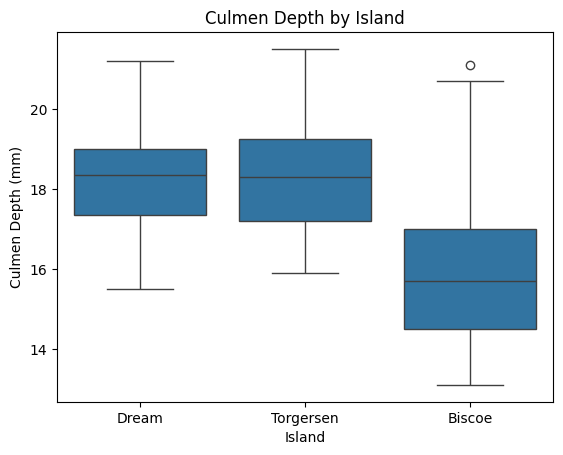

In [ ]:
# Visualization #3

# Mapping dictionary for Island names
island_mapping = {0: "Dream", 1: "Torgersen", 2: "Biscoe"}

# Create boxplot using seaborn
plt = sns.boxplot(data=penguin_train, y="Culmen Depth (mm)", x="Island")

# Set titles, axis labels, and rename ticks on x-axis
plt.set_title("Culmen Depth by Island")
plt.set_xlabel("Island")
plt.set_ylabel("Culmen Depth (mm)")

# Update x-axis ticks with Island names
plt.set_xticklabels([island_mapping[int(tick.get_text())] for tick in plt.get_xticklabels()])

Description of figure 3: Vertical boxplot depicting the distribution of culmen depth for each island.

### 4) Feature Selection

After understanding the data through various explorations, we are confident and ready to select the features our models will use. While there are multiple comparably good combinations of features, we want to make sure to select from the very best combinations of features. We can evaluate this idea of "best" using k-fold cross-validation to produce scores for certain columns of data in combination with each other. Once we establish these scores, picking comes down to a combination of these CV scores and the figures we created in our exploratory analysis. After we have selected these features, we can use them to train our models and observe how they perform.

In [ ]:
def check_column_score(features, penguin, max_iter=10**4):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    print("training with columns " + str(features))

    # Getting our specific X_train and y_train
    X_train_sub = penguin[features]
    y_train_sub = penguin['Species']

    # Train Logistic Regression with increased max_iter
    LR = LogisticRegression(max_iter=max_iter, solver='lbfgs')
    return cross_val_score(LR, X_train_sub, y_train_sub, cv = 5).mean()

In [ ]:
combos = [['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Island', 'Flipper Length (mm)',	'Body Mass (g)'],
          ['Island', 'Delta 15 N (o/oo)',	'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Flipper Length (mm)',	'Body Mass (g)'],
          ['Sex', 'Delta 15 N (o/oo)',	'Delta 13 C (o/oo)']]

for feature in combos:
    x = check_column_score(feature, penguin_train)
    print("CV score is " + str(np.round(x, 3)))

training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.992
training with columns ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.899
training with columns ['Island', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
CV score is 0.88
training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.988
training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.802
training with columns ['Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
CV score is 0.818


Selected features for models 1 and 2: Island, Culmen Length, Culmen Depth.
Selected features for model 3: Sex, Culmen Length, Culmen Depth.

Justification: We chose these two feature sets because we believe they most simply break down the dataset, allowing us to build strong models that will correctly classify our data. Based on our exploratory analysis, our first qualitative feature, Island, easily groups the data into distinct clusters, each corresponding to specific characteristics of the dataset, as seen in the table above. This makes it a natural choice for segmenting the data into meaningful subsets. Our other qualititive feature choice is Sex, which from the summary table we saw there was a difference in the means between male and female penguins of all species, making it an intuitive choice as well. The next two features are quantitative. By focusing on culmen length and culmen depth together, we are effectively claiming that the size and shape of the penguin's bill, alongside its location, is enough information to determine its species. In fact, in our exploratory analysis, the scatterplot shows distinct clusters of species for our dataset based solely on culmen length and depth. Overall, based on the findings from our exploratory analysis, we have decided to move forward using those three features in our classification models.

In [ ]:
selected_features = ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']

X_train = penguin_train[selected_features]
y_train = penguin_train['Species']
X_test = penguin_test[selected_features]
y_test = penguin_test['Species']

### 5) Modeling


Now that we have an idea of the best combinations of features, we will explore how different models perform on the data. For the first two models, we use the features above, but for the third we replace the 'Island' column with the 'Sex' column. This decision was made because these combinations had comparable CV scores in our feature analysis above. Below, we will train our models by giving many possible values for important arguments to the model, evaluating their score using cross-validation to protect against overfitting, and using the argument values we find to create models. We observe how these models perform in a couple different graphs and discuss the findings, recognizing how these three different models all manage to produce somewhat stunning performances.

####  a) Logistic Regression

Logistic regression utilizes a softmax function for classification, which calculates the probability of a data point belonging to a each class. The output of thhis function is mapped to a probability value between 0 and 1. In our case, we will be attempting multinomial logistic regression, since we are attempting to classify a variable with more than two classes. In practice, the class with the highest probability from the softmax function is chosen for prediction.

In [ ]:
# Model 1: Multinomial Logistic Regression

# a) Cross Validation to choose complexity parameters

C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]

def cv_lr(X_train, y_train, C_values):
  '''
  Function to find best C value for logistic regression using cross validation
  Args: X_train, y_train, C_values
  Returns: best C value
  '''
  # Initialize values before search
  best_C = None
  best_score = 0
  cv_scores = []

  #Loop through list of C values to determinen best regularization parameter C
  for C in C_values:
    # Create model with iterated parameter value C
    lr = LogisticRegression(C=C, solver = 'lbfgs', max_iter=1000)

    # Score model using cross val score
    cv_score = cross_val_score(lr, X_train, y_train, cv=5).mean()

    # Add score to list of cross val scores
    cv_scores.append(cv_score)

    # If current score is better than best score, reassign variables accordingly
    if cv_score > best_score:
      best_score = cv_score
      best_C = C

  # Return best performance score and parameters values from search
  return best_C, best_score

# Use function call to find best parameters of our model
best_C, best_score = cv_lr(X_train, y_train, C_values)

# Print best parameter and score
print(f"Best C value: {best_C}")
print(f"Best cross-validation score: {best_score}")


Best C value: 1000
Best cross-validation score: 0.9923076923076923


In this first part, we've found the best C value for our model. The C value acts as a control for the strength of regularization, with the goal of preventing overfitting in our model. The cross validation score verifies our models permorfance with such choice for C.

Training accuracy: 1.0
Test accuracy: 0.9848484848484849


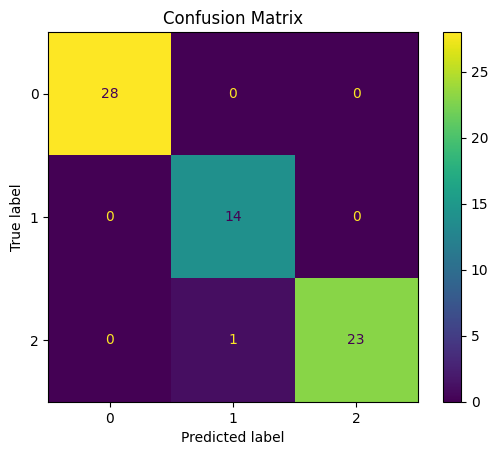

In [ ]:
# b) Evaluation of unseen data, including a confusion matrix.
import matplotlib.pyplot as plt # Re-import matplotlib.pyplot to restore plt

# Fit model to training data and score on test data.
lr = LogisticRegression(C=best_C, solver = 'lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
train_score = lr.score(X_train, y_train)
score = lr.score(X_test, y_test)
print(f"Training accuracy: {train_score}")
print(f"Test accuracy: {score}")

# Build confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap="viridis", values_format='d')
plt.title("Confusion Matrix")
plt.show()

In this second part, we fit our model to the training data and scored our model on the test data. This model performed quite well against the test data! We've displayed this models performace in the confusion matrix, which compares the models predicted labels with the actual labels.

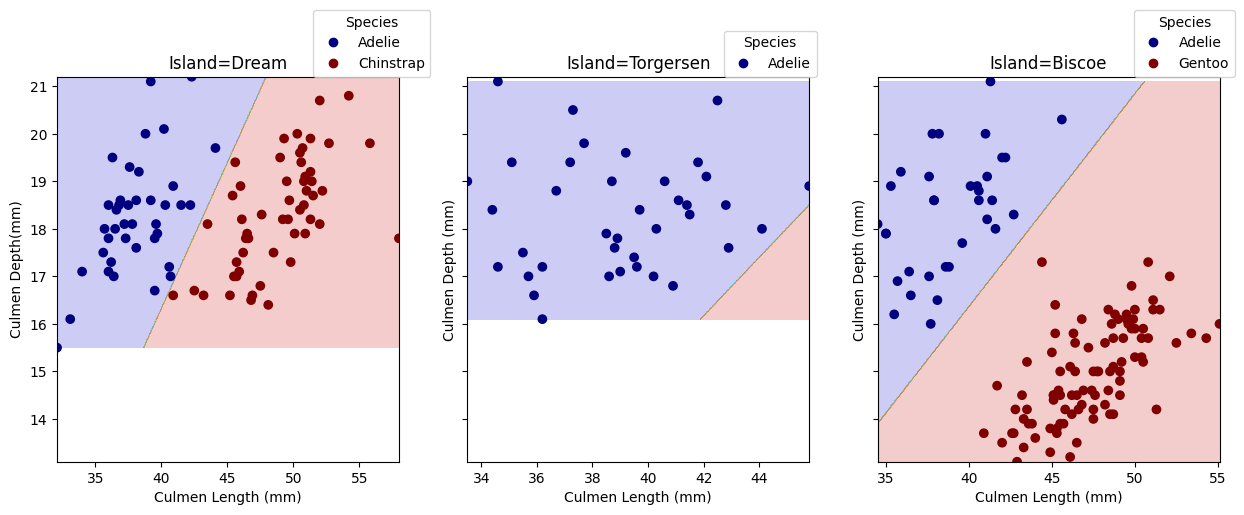

In [ ]:
# c) Visualization of decision regions for the model, with one subplot plot for each Island

#plot decision boundary

def plot_lr_regions(model,X,y):
  '''
  Function to plot the decision regions for the logistic regression model
  Args: model, X (data frame), y (data frame)
  Returns: None, plots decision regions
  '''

  # Unique island values
  island_values = X["Island"].unique()

  # Add species dictionary
  species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}

  # Create subplots with a shared y-axis
  fig, axes = plt.subplots(1, len(island_values), sharey=True, figsize=(15,5))

  for i, island_value in enumerate(island_values):
    # Filter data based on the island value
    X_filtered = X[X["Island"] == island_value]
    y_filtered = y[X["Island"] == island_value]

    # Extract the features for the decision boundary
    x0=X_filtered["Culmen Length (mm)"]
    x1=X_filtered["Culmen Depth (mm)"]

    # Create a grid for plotting
    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y)

    # Flatten the grid for predictions
    XX = xx.ravel()
    YY = yy.ravel()

    # Create a DataFrame for grid points with island value
    grid_df = pd.DataFrame({
          "Culmen Length (mm)": XX,
          "Culmen Depth (mm)": YY,
          "Island": np.full(XX.shape, island_value)  # Fill with island value
      })

    # Align column order and preprocess Island
    grid_df = grid_df[X.columns]
    grid_df["Island"] = LabelEncoder().fit(X["Island"]).transform(grid_df["Island"])

    # Predict for grid points
    p=model.predict_proba(grid_df)
    p_classes = np.argmax(p, axis=1).reshape(xx.shape)

    # Get the corresponding island for the subplot title
    island_title = {0: "Dream", 1: "Torgersen", 2: "Biscoe"}[island_value]

    #plot the current subplot
    ax = axes[i]
    ax.contourf(xx,yy,p_classes, cmap="jet", alpha=0.2)
    scatter = ax.scatter(x0, x1, c=y_filtered, cmap="jet")
    ax.set(title=f'Island={island_title}', xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

    # Only label y-axis on the first subplot
    if i == 0:
      ax.set(ylabel="Culmen Depth(mm)")

    # Add a legend
    handles, _ = scatter.legend_elements()
    labels = [species_mapping[cls] for cls in np.unique(y_filtered)]
    ax.legend(handles, labels, title="Species", loc=(0.75,1))

  plt.show()

plot_lr_regions(lr, X_train, y_train)

In this third part, we plotted the decision regions for the Culmen Length and Culmen Depth of each penguin species, and separated them by Islands. Dream and Biscoe islands classify between two species, and Torgerson only contains one. The classification appears linear, with species separated by a straight line decision boundary.
The culmen length and depth ranges differ slightly across islands, influencing the boundaries.

d) *Model discussion:* To analyze the accuracy of this model, we can first look to the confusion matrix. For the first species, Adelie, there are 28 correct predictions, for Chinstrap, 14 there are correct predictions, and for Gentoo, there are 23 correct predictions. There is one misclassification, the model incorrectly predicts a Gentoo penguin to be Chinstrap. The overall model performace is extremely strong, with an accuracy score of 98.5% on the test data.  

We can inspect this mistake by exploring the decision region plot for Dream Island. Here, there is a thin boundary with potential overlap in feature values, which may cause the misclassification.

There are several limitation to the logistic regression model, the first being that logistic regression assumes linear boundaries between the classes. If the true relationship is non-linear, the model will be prone to misclassification. Another limation arises from class sample sizes, so if one class has fewer samples, the model may misplace the decision boundary and misclassify the values.  

Some potential improvements for the model include additional feature engineering or regularization to handle the one overlapping case.



#### b) Random Forest Classifier Model

The random forest classification (rfc for short) model is a supervised machine learning algorithm that uses multiple decision trees to classify data, where each tree is trained on a random subset of the data and features, ultimately making a prediction based on the majority vote of all the trees. Thus, this model is good at avoiding overfitting and improving overall accuracy scores.

In [ ]:
# a) cross validation to choose complexity parameter

def best_rf_model(X, y):
  '''
  function to find best n value for random forest regression
  using cross validation
  Args: model, X_train, y_train
  Returns: best C value
  '''
  best_score = 0
  best_N = None

  for n in np.arange(1, 100, 1):
      rfc = RandomForestClassifier(n_estimators=n, random_state=42)
      cv_score = cross_val_score(rfc, X, y, cv=10).mean()
      if cv_score > best_score:
          best_score = cv_score
          best_N = n

  return best_score, best_N

In [ ]:
best_rfc_sore, best_N = best_rf_model(X_train, y_train)
print(f"Best N value: {best_N}")
print(f"Best cross-validation score: {best_rfc_sore}")

Best N value: 12
Best cross-validation score: 0.9803076923076922


In part a of the rfc model, we found the best N parameter to pass into ouor model, which is just the number of observations in the training data set. This results in a high cross-validation score of about 98% or higher.

Test accuracy: 0.9545454545454546


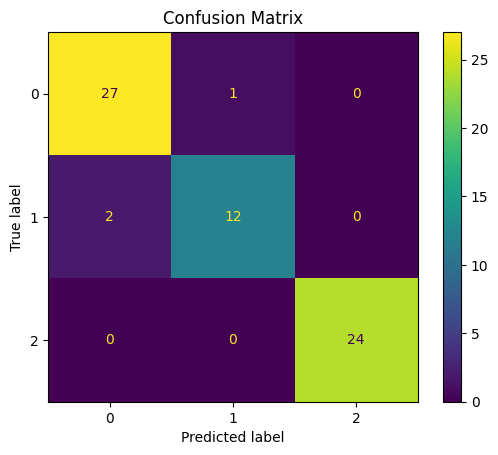

In [ ]:
# b) Evaluation of unseen data

rfc = RandomForestClassifier(n_estimators=best_N, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
print(f"Test accuracy: {score}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap="viridis", values_format='d')
plt.title("Confusion Matrix")
plt.show()

For the rfc model in part b, we tend to have a high test accuracy of 95% or higher which is very good. In the confusion matrix, there were usually 1 to 3 cases where the model predicted incorrectly, but otherwise the model predicts correctly most of the time as shown on the diagonal of the matrix.

In [ ]:
# c) Visualization of decision regions for the model, with one subplot plot for
# each Island corresponding to the qualitative variables of the species.

#plot decision boundary

def plot_rfc_regions(model,X,y):
    '''
    Function to plot the decision regions for the rfc model
    Args: model, X (data frame), y (data frame)
    Returns: None, plots decision regions
    '''
    # Unique island values
    island_values = X["Island"].unique()

    # Dynamically map species labels
    species_mapping = {label: species for label, species in zip(model.classes_, ["Adelie", "Chinstrap", "Gentoo"])}

    # Create a normalization object to map the class labels to the colormap
    norm = mcolors.BoundaryNorm(boundaries=np.arange(len(species_mapping) + 1) - 0.5, ncolors=256)

    # Create subplots with a shared y-axis
    fig, axes = plt.subplots(1, len(island_values), sharey=True, figsize=(15,5))

    for i, island_value in enumerate(island_values):
      # Filter data based on the island value
      X_filtered = X[X["Island"] == island_value]
      y_filtered = y[X["Island"] == island_value]

      # Extract the features for the decision boundary
      x0=X_filtered["Culmen Length (mm)"]
      x1=X_filtered["Culmen Depth (mm)"]

      # Create a grid for plotting
      grid_x=np.linspace(x0.min(),x0.max(),501)
      grid_y=np.linspace(x1.min(),x1.max(),501)
      xx,yy=np.meshgrid(grid_x,grid_y)

      # Flatten the grid for predictions
      XX = xx.ravel()
      YY = yy.ravel()

      # Create a DataFrame for grid points with island value
      grid_df = pd.DataFrame({
            "Culmen Length (mm)": XX,
            "Culmen Depth (mm)": YY,
            "Island": np.full(XX.shape, island_value)  # Fill with island value
        })

      # Align column order and preprocess Island
      grid_df = grid_df[X.columns]
      grid_df["Island"] = LabelEncoder().fit(X["Island"]).transform(grid_df["Island"])

      # Predict class labels for grid points
      p=model.predict_proba(grid_df)
      p_classes = np.argmax(p, axis=1).reshape(xx.shape)

      # Get the corresponding island for the subplot title
      island_title = {0: "Dream", 1: "Torgersen", 2: "Biscoe"}[island_value]

      #plot the current subplot
      ax = axes[i]
      ax.contourf(xx, yy, p_classes, cmap="jet", norm=norm, alpha=0.2)
      scatter = ax.scatter(x0, x1, c=y_filtered, cmap="jet", norm=norm)
      ax.set(title=f'Island={island_title}', xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

      # Only label y-axis on the first subplot
      if i == 0:
        ax.set(ylabel="Culmen Depth(mm)")

      # Add a legend
      handles, _ = scatter.legend_elements()
      labels = [species_mapping[cls] for cls in np.unique(y_filtered)]
      ax.legend(handles, labels, title="Species", loc=(0.75,1))

plt.show()

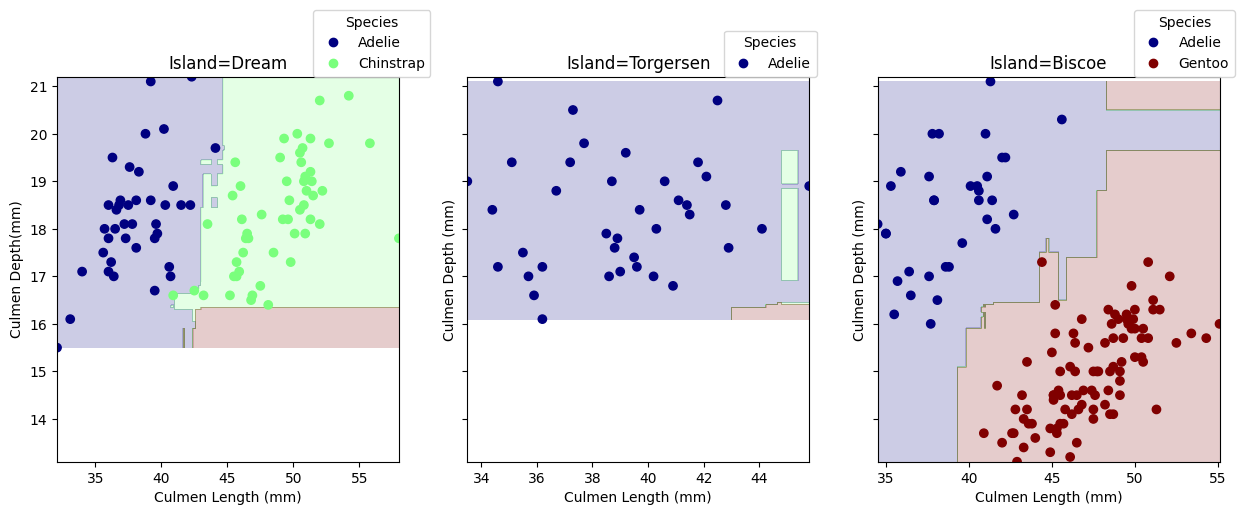

In [ ]:
plot_rfc_regions(rfc, X_train, y_train)

In part c for the rfc model, we plotted the decision regions for the culmen length and culmen depth of each penguin species, and separated them by islands, very similar to the methods used for the logistic regresiion model's decision regions. But as we can see, the output is very different when it comes to classifying the regions for the species, and this would be due to rfc being a classification model, making these regions boxier rather than being separated by a linear line.

(d)
By looking at the decision regions for the rfc model, we can tell there are two misclassified Chinstrap data points on the Dream subplot.The decision boundary incorrectly assigns these points to the Adelie class (as seen by the incorrect color for these points). The model may struggle to distinguish these species in cases where their features are very similar or when there is not enough training data to fully capture the variability of each species on this island.

The decision region for the Gentoo species is observed on both the Torgersen and Dream islands, even though there are no Gentoo data points in the training set for these islands. This indicates that the model has incorrectly learned to classify regions of the feature space as belonging to Gentoo when, in reality, the Gentoo species is not present on these islands. This could be due to overfitting, where the model has learned fake patterns in the data, or it might be a result of the model assigning the wrong label based on similar feature values shared by the islands, despite the species not being present.

Similarly, there is an area of the decision region on Torgersen Island where the model incorrectly assigns the Chinstrap class, even though Chinstrap penguins do not inhabit Torgersen Island. This could indicate that the model has learned a decision boundary that does not reflect the true distribution of species across the islands. The model might have generalized the class boundaries based on similar features seen in the training data, leading to a classification error on regions where Chinstraps should not appear. This could also be a result of the model being overly complex, capturing noise and non-representative patterns in the data.

#### c) SGD Classification model

For our third model, we chose the Stochastic Gradient Descent Classifier. This model separates regions of data by hyperplanes. The SGD Classifier is a linear classifier, meaning it constructs a linear decision boundary to separate classes. This makes it suitable for problems where the relationship between features and the target variable is roughly linear, which I observed to be pretty reasonable with this data set when it is separated by sex. As we will observe in the later graphs, separating the data into hyperplanes is fairly accurate and very digestible visually. One of my favorite aspects of this model is the figures it produces.

In the first part of this exploration, I will create the training and test sets using our already created data cleaning function on the selected features.

In [ ]:
# new data - use sex instead of island!
new_selected_features = ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

new_X_train = penguin_train[new_selected_features]
new_y_train = penguin_train['Species']
new_X_test = penguin_test[new_selected_features]
new_y_test = penguin_test['Species']

After creating the data, I write a function to produce a model with the most accurate parameters. Alpha represents how strong the regularization term is. The regularization term in this model is essentially a penalty added to the loss function to make the model-created hyperplanes more accurate. The loss function can be any of those in the list below, depending on which fits the data best for a given alpha. I was surprised to find in my analysis that the loss function actually changed from run to run depending on the alpha. After finding the best combination, I create a model using my function and output it!

In [ ]:
def optimal_sgd(X,y):
  '''
  Function to find optimal alpha and l1_ratio for the model given training data

  Parameters:
  X,y - training data used to determine goal variables

  Returns:
  Best values for alpha and loss function and corresponding best cross-val score, as described above!

  '''
  #initialize values using None so they are certain to take on other values.
  best_alpha = None
  best_loss = None
  best_score = 0
  #run nested loops to determine best pairing of parameters.
  for alpha in np.linspace(1e-6,1,200):
    for loss in ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron"]:
      #create model for parameter values
      sgd = SGDClassifier(alpha = alpha, loss = loss, random_state = 60)
      #score model with given parameters
      cv_score = cross_val_score(sgd, X, y, cv=5).mean()
      #if the score is the best recorded, we update our variables accordingly
      if cv_score > best_score:
        best_score = cv_score
        best_alpha = alpha
        best_loss = loss
  #after loops have run, give back the best performance score and corresponding variables
  return best_alpha, best_loss, best_score
#set variables equal to output of the model and print them to the console
best_alpha, best_loss, best_score = optimal_sgd(new_X_train, new_y_train)
print(f"Best alpha value: {best_alpha}")
print(f"Best loss method: {best_loss}")
print(f"Best cross-validation score: {best_score}")

Best alpha value: 0.47738745728643217
Best loss method: squared_hinge
Best cross-validation score: 0.9650829562594267


We want to display how the model performs on the test data in a consumable format. A confusion matrix is the best way to do so. This confusion matrix displays a graph of the species and their predicted labels.

Test accuracy: 0.9696969696969697


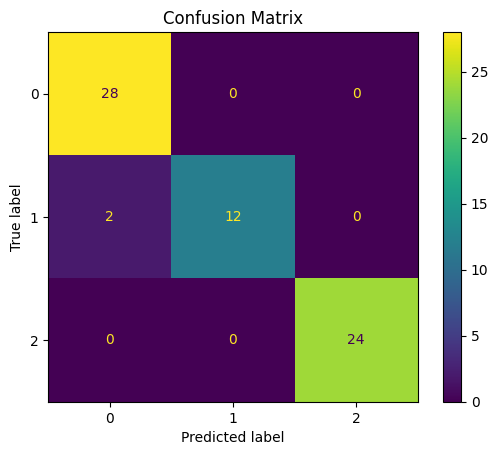

In [ ]:
# b) Evaluation of unseen data, including a confusion matrix.

sgd = SGDClassifier(alpha = best_alpha, loss = best_loss, random_state=60)
sgd.fit(new_X_train, new_y_train)
new_y_pred = sgd.predict(new_X_test)
score = sgd.score(new_X_test, new_y_test)
print(f"Test accuracy: {score}")

#confusion matrix
new_cm = confusion_matrix(new_y_test, new_y_pred, labels=sgd.classes_)
new_disp = ConfusionMatrixDisplay(confusion_matrix=new_cm, display_labels=sgd.classes_)
new_disp.plot(cmap="viridis", values_format='d')
plt.title("Confusion Matrix")
plt.show()

Notice that above, the confusion matrix classifies 64/66 values correctly, and 64/66 does in fact equal 0.9692. The confusion matrix shows that there are 28 correct predictions for Gentoo, 12 correct and 2 incorrect predictions for Chinstrap, and 24 correct predictions for Adelie. The model incorrectly predicts two chinstrap penguins to be Gentoo.

To visualize our data more clearly, we next create figures to represent the data regions of the model. I love the SGD classifier because the hyperplanes it creates make for beautiful, easily readable graphs. The code below creates the graphs, which I will accompany with a brief description.

In [ ]:
# A visualization of decision regions for the model, with one plot corresponding to each value of the qualitative variable.
# You are not permitted to use the mlxtend package to construct your decision regions.
# Your colors must be consistent between your decision region plots.
# You must also provide a readable legend and correct axis labels.

def plot_sgd(model, X, y):
    '''
    Function to plot the decision regions for the logistic regression model
    Args: model, X (data frame), y (data frame)
    Returns: None, plots decision regions
    '''

    # Unique "Sex" values
    sex_values = X["Sex"].unique()

    # Dynamically map species labels
    species_mapping = {label: species for label, species in
                       zip(model.classes_, ["Adelie", "Chinstrap", "Gentoo"])}

    # Create subplots with a shared y-axis
    fig, axes = plt.subplots(1, len(sex_values), sharey=True, figsize=(15, 5))

    for i, sex_value in enumerate(sex_values):
        # Filter data based on the "Sex" value
        X_filtered = X[X["Sex"] == sex_value]
        y_filtered = y[X["Sex"] == sex_value]

        # Extract the features for the decision boundary
        x0 = X_filtered["Culmen Length (mm)"]
        x1 = X_filtered["Culmen Depth (mm)"]

        # Create a grid for plotting
        grid_x = np.linspace(x0.min(), x0.max(), 501)
        grid_y = np.linspace(x1.min(), x1.max(), 501)
        xx, yy = np.meshgrid(grid_x, grid_y)

        # Flatten the grid for predictions
        XX = xx.ravel()
        YY = yy.ravel()

        # Create a DataFrame for grid points with "Sex" value
        grid_df = pd.DataFrame({
              "Culmen Length (mm)": XX,
              "Culmen Depth (mm)": YY,
              "Sex": np.full(XX.shape, sex_value)  # Fill with "Sex" value
          })

        # Align column order and preprocess "Sex"
        grid_df = grid_df[X.columns]
        grid_df["Sex"] = LabelEncoder().fit(X["Sex"]).transform(grid_df["Sex"])

        # Predict class labels for grid points
        p = model.predict(grid_df)  # Get predicted class labels
        p_classes = p.reshape(xx.shape)  # Reshape predictions to grid shape

        # Get the corresponding "Sex" for the subplot title
        sex_title = sex_value

        # Plot the current subplot
        ax = axes[i]
        ax.contourf(xx, yy, p_classes, cmap="jet", alpha=0.2)
        scatter = ax.scatter(x0, x1, c=y_filtered, cmap="jet")
        ax.set(title=f"Sex={sex_title}", xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")

        # Only label y-axis on the first subplot
        if i == 0:
            ax.set(ylabel="Culmen Depth (mm)")

        # Add a legend
        handles, _ = scatter.legend_elements()
        labels = [species_mapping[cls] for cls in np.unique(y_filtered)]
        ax.legend(handles, labels, title="Species", loc="upper right")

        #fix titles
        sex_mapping = {0: "Male", 1: "Female"}
        sex_title = sex_mapping[sex_value]
        ax.set(title=f"{sex_title}")

    plt.show()

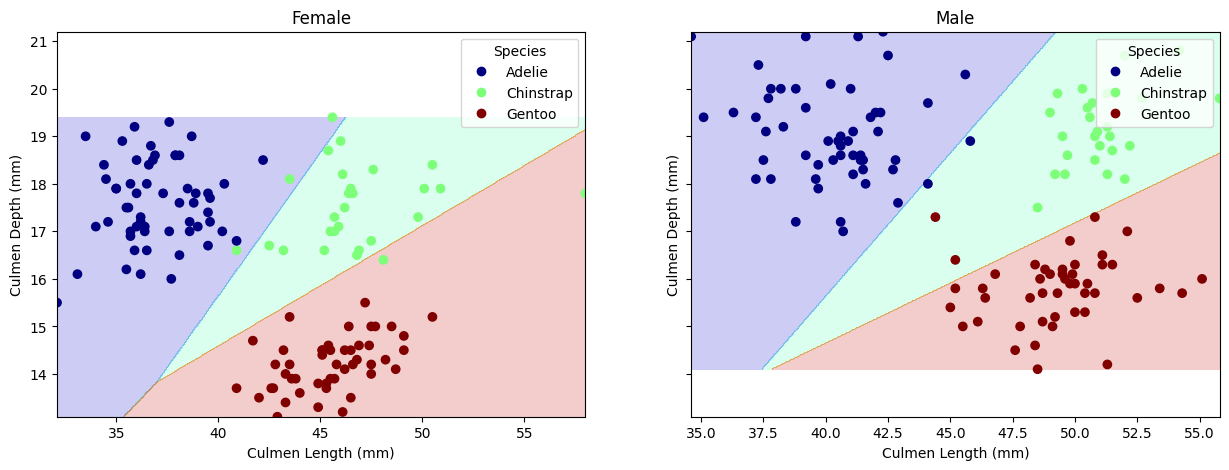

In [ ]:
plot_sgd(sgd, new_X_train, new_y_train)

In the above graphs, the background hues represent model-created hyperplanes that categorize the data, while the color of the data points represent the actual species of the penguins. Notice that the model performs very well in separating this data for both males and females. It looks to correctly classify every male and only misclassify two females! We found that relative to other models, these graphs were by far the simplest to understand, while also not losing much accuracy.

Of course, the model does make mistakes. The model misclassifies four chinstrap females incorrectly, guessing 3 of them are adelie and one is chinstrap. The model misclassifies two adelie males as chinstrap and two gentoo males as chinstrap. Graphically, we can observe this is a slight error in the hyperplane creation of the model, although perhaps the choice of model is also at fault, or the choice of parameters. In both graphs, the model seems to be at fault for incorrectly chosen hyperplanes. It is visually possible to construct perfect regions between all three species in each case. For females, the model needs to expand chinstrap penguins to a slightly higher ratio of culmen depth to culmen length than it currently does. For males, the model must recognize that only higher values of culmen length and culmen depth are possible for chinstrap penguins. This is controlled by the alpha parameter, which directs the vector produced by the model loss function. I think I could solve this issue by adding more possible values to the alpha, but of course this runs the risk of overfitting, which would have the inverse effect, especially with this type of model because it creates linear planes, so over-recognizing any trends would lose me a lot of accuracy.

Additionally, to improve upon my current model, I could introduce the hyperparameter penalty. The penalty defauls to **l2** which is the standard regularizer for linear SVM models, but if I changed it to one of the other options, they would l1 or elasticnet, which would introduce sparsity to the model. I learned that sparsity is the regulation of features and their weights relative to each other. I thought it would be unnecessary since there are only two features in this data, but it would be fascinating to experiment with. Maybe the model could be improved by weighting one category more heavily.

### 6) Conclusion



We tested three different models which all vastly exceeded our expectations, especially given the limited data allowed.

Our logistic regression model was nearly perfect, in large part due to the measuments provided to the model. Observable in the graphs, islands reduced the model from deciding between three species of penguin to at most two, so the logisitic regression model's ability to recommend what we visually see as a dividing line was a perfect strategy. Most observable in the Dream Island subplot, the choice of C value from the cv_lr function was critical and successful. In the Dream figure, there is very little space between the two species, and the model is able to still perfectly divide the data. Perhaps the weakness of this model would be its reliance on the data it was trained with, as with more complex data it would certainly have less success. However, we would certainly recommend the combination of the logistic regression model and the feature set of Island, Culmen length, and Culmen depth. More data values might help the model better capture the true decision boundaries and avoid overlap between classes.

Our random forest classifier model was similarly effective. This model uses alarge amount of decision trees to classify data, where each tree is trained on a subset of the data, and contributes a "vote" to the final classification of the model. To optimize this model, we iterated through the model using 1 through 100 trees and selected the one with best performance on the training data. The score on the test data was similar, likely due to the model being adept at avoiding overfitting (since each model is trained on a separate subset of data, and any individual tree that becomes somewhat overly obsessed with a trend in the data will be drowned out by the majority). Observable in the graph, this model creates somewhat irregulalry shaped regions dictated by these 'votes' but they are highly effective at making predictions. The model only slightly missed two of the points on the Dream island, likely indicating a fairly close vote. Unfortunately, there seems to be very little way of fixing these votes and avoiding changing other votes due to limited data other than a "lucky" trial with the data. The model would be improved by more data because trees would become more effective, as right now the trees are fairly small. As we saw in lecture, trees of 5-6 values tend to perform better than smaller trees, so adding further classifiers (to some extent) would improve the model's "votes" for even the same amount of trees. Even in its current state, though, this model is easily recommendable, as it is near perfect, and even its inaccuracies are by a slight margin, more the fault of a limited amount of data than anything else in our opinion.

Our stochastic gradient descent model performed slightly worse than the other two, but likely could've been improved by adding/focusing the arguments to the model. Observable in the graphs, grouping the data by sex did clearly separate the species into categories that could've been perfectly captured by planes expanding outward from the origin. However, the model was slightly inaccurate in doing so. Our best guess is that the alpha coefficient, described in the model mistakes section, could've been engineered more specifically, but any more iterations made the computer struggle to run the code in a time-efficient manner, something to consider when working with these models. However, changing the penalty function to something a little more complex could've certainlty been effective had more data been provided. I believe adding another qualitative value would've been super helpful for the model WITHOUT changing the penalty function, and perhaps adjusting the alpha. Something akin to "Island", "Sex", "Culmen depth", "Culmen Length" would've made the categories even more separate, enough for even a somewhat inconsistent model to construct accurate hyperplanes. In theory, adding other quantitative features would be effective as well, only in that circumstance we would include another loop to test every penalty function. As decribed above, introducting functions that deal with sparsity would be effective if we had more complex data, likely making the model more effective. For both qualitative and quantitative data additions, feature enhancements would reduce overlap between classes and allow the model to construct hyperplanes that better capture distinctions between species. While the other models performed better, even in its current state the SGD classifier is recommendable because we think it could be improved upon and it already performs reasonably well.
